In [ ]:
#전이학습 모델과 모델링 과정 빼고 동일하게

### import packages

In [ ]:
!python --version

Python 3.7.10


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
!nvidia-smi

Sun Apr 18 13:45:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/MyDrive/인공지능 프로젝트/data/image'

total 1608689
-rw------- 1 root root 328123260 Apr 14 08:50  capture_data.zip
drwx------ 2 root root      4096 Apr 14 07:56 'classified image'
drwx------ 2 root root      4096 Apr  7 07:27 'crop image'
-rw------- 1 root root 351567211 Apr  9 08:52  data6.zip
-rw------- 1 root root 540218524 Apr 18 13:31 'data_All(crop).zip'
drwx------ 2 root root      4096 Apr 12 00:22 'mark yolo'
drwx------ 2 root root      4096 Apr 13 01:49 'test image'
-rw------- 1 root root 127936660 Apr 12 05:25 'walking dead_s09e04(modified).zip'
-rw------- 1 root root 292564196 Apr  8 01:35 'walking dead_s09e05.zip'
-rw------- 1 root root   4570216 Apr  6 01:38 'zombie2(walking dead_google).zip'
-rw------- 1 root root   2298382 Apr  5 08:13 'zombie(walking dead_google).zip'


In [ ]:
!unzip '/content/drive/MyDrive/인공지능 프로젝트/data/image/data_All(crop).zip'

Archive:  /content/drive/MyDrive/인공지능 프로젝트/data/image/data_All(crop).zip
  inflating: data_All/test/human/human_google_0000001 (10).jpg  
  inflating: data_All/test/human/human_google_0000001 (100).jpg  
 extracting: data_All/test/human/human_google_0000001 (101).jpg  
  inflating: data_All/test/human/human_google_0000001 (102).jpg  
  inflating: data_All/test/human/human_google_0000001 (103).jpg  
  inflating: data_All/test/human/human_google_0000001 (104).jpg  
 extracting: data_All/test/human/human_google_0000001 (105).jpg  
  inflating: data_All/test/human/human_google_0000001 (106).jpg  
 extracting: data_All/test/human/human_google_0000001 (107).jpg  
  inflating: data_All/test/human/human_google_0000001 (108).jpg  
  inflating: data_All/test/human/human_google_0000001 (109).jpg  
  inflating: data_All/test/human/human_google_0000001 (11).jpg  
  inflating: data_All/test/human/human_google_0000001 (110).jpg  
  inflating: data_All/test/human/human_google_0000001 (111).jpg  
  inf

## jpg 변환

In [ ]:
# -----------------------
#  change directory name
# -----------------------

data_root_dir = 'data_All'
os.listdir(data_root_dir)

['train', 'valid', 'test']

In [ ]:
# -----------------------
#  change directory name
# -----------------------
dir_names = [data_root_dir + child for child in ['/train/human', '/train/zombie',  '/valid/human', '/valid/zombie', '/test/human', '/test/zombie']]


# 확장자 명 정규 표현식
p = re.compile('(.*)[.].*$')


for dir_name in dir_names :
    for file_name in os.listdir(dir_name) :
        if '.' in file_name : # only files (Not directory)
            os.rename(f'{dir_name}/{file_name}', f'{dir_name}/{p.search(file_name).group(1) + ".jpg"}')

In [ ]:
# 확장자 명 확인
os.listdir(data_root_dir + '/train/human')[:5]

['20210408093725.jpg',
 '20210409100918.jpg',
 '20210408092950.jpg',
 '20210408093902.jpg',
 '20210407170058.jpg']

In [ ]:
train_dir = data_root_dir + '/train'
valid_dir = data_root_dir + '/valid'
test_dir = data_root_dir + '/test'


print(f'- Train Directory : {train_dir}')
print(f'- Validation Directory : {valid_dir}')
print(f'- Test Directory  : {test_dir}')

- Train Directory : data_All/train
- Validation Directory : data_All/valid
- Test Directory  : data_All/test


In [ ]:
train_human_dir = train_dir + '/human'
train_zombie_dir = train_dir + '/zombie'
valid_human_dir = valid_dir + '/human'
valid_zombie_dir = valid_dir + '/zombie'
test_human_dir = test_dir + '/human'
test_zombie_dir = test_dir + '/zombie'

print('* Train Human Data')
print(f'==> {len(os.listdir(train_human_dir))}')

print('\n* Train Zombie Data')
print(f'==> {len(os.listdir(train_zombie_dir))}')

print('\n* Validation Human Data')
print(f'==> {len(os.listdir(valid_human_dir))}')

print('\n* validation Zombie Data')
print(f'==> {len(os.listdir(valid_zombie_dir))}')

print('\n* Test Human Data')
print(f'==> {len(os.listdir(test_human_dir))}')

print('\n* Test Zombie Data')
print(f'==> {len(os.listdir(test_zombie_dir))}')

* Train Human Data
==> 1712

* Train Zombie Data
==> 1360

* Validation Human Data
==> 315

* validation Zombie Data
==> 179

* Test Human Data
==> 234

* Test Zombie Data
==> 61


## Generate Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range=90,
                               horizontal_flip = True,
                               vertical_flip = True)

valid_gen = ImageDataGenerator(rescale = 1./255)

test_gen = ImageDataGenerator(rescale = 1./255)


train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (200,200),
                                           batch_size = 20,
                                           class_mode = 'binary')

valid_data = valid_gen.flow_from_directory(valid_dir,
                                         target_size = (200,200),
                                         batch_size = 20,
                                         shuffle = False,
                                         class_mode = 'binary')

test_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (200,200),
                                         batch_size = 20,
                                         shuffle = False,
                                         class_mode = 'binary')

Found 3072 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Found 295 images belonging to 2 classes.


In [ ]:
print(f'- Train data : {len(train_data)} batches')
print(f'- Valid data  : {len(valid_data)} batches')
print(f'- Test data  : {len(test_data)} batches')

- Train data : 154 batches
- Valid data  : 25 batches
- Test data  : 15 batches


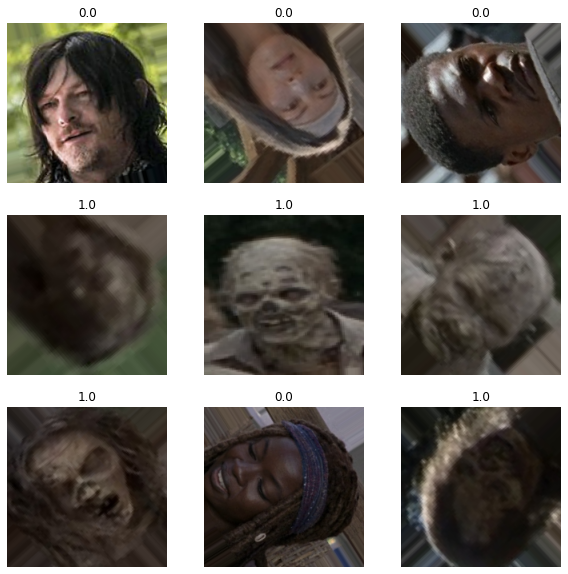

In [ ]:
images = train_data[0][0][:9]
labels = train_data[0][1][:9]

plt.figure(figsize = (10,10))

for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis(False)

plt.show()

***
<br><br><br><br>
***

# Functions

## Plot Function

In [ ]:
def plot_score(hist) :
    plt.figure(figsize = (16,12))

    plt.subplot(2,2,1)
    plt.plot(hist.epoch, hist.history['loss'], label = 'Train')
    plt.plot(hist.epoch, hist.history['val_loss'], label = 'Valid')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train & Valid Loss')
    plt.axhline(0.2, color = 'red', linewidth = 1, linestyle = '--')
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(hist.epoch, hist.history['accuracy'], label = 'Train')
    plt.plot(hist.epoch, hist.history['val_accuracy'], label = 'Valid')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train & Valid Accuracy')
    plt.axhline(0.9, color = 'red', linewidth = 1, linestyle = '--')
    plt.legend()


    plt.subplot(2,2,3)
    plt.plot(hist.epoch, hist.history['recall'], label = 'Train')
    plt.plot(hist.epoch, hist.history['val_recall'], label = 'Valid')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title('Train & Valid Recall')
    plt.axhline(0.9, color = 'red', linewidth = 1, linestyle = '--')
    plt.legend()

    plt.subplot(2,2,4)
    plt.plot(hist.epoch, hist.history['precision'], label = 'Train')
    plt.plot(hist.epoch, hist.history['val_precision'], label = 'Valid')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.title('Train & Valid Precision')
    plt.axhline(0.9, color = 'red', linewidth = 1, linestyle = '--')
    plt.legend()

    plt.show()

## Score Function

In [ ]:
def print_score(model, test_data) :
    loss, acc, recall, precision = model.evaluate(test_data)

    print('\n')
    print('*'*16)
    print('*  Evaluation  *')
    print('*'*16)

    print('\n* Loss')
    print(f'==> {loss:.5f}')

    print('\n* Accuracy')
    print(f'==> {acc:.5f}')

    print('\n* Recall')
    print(f'==> {recall:.5f}')

    print('\n* Precision')
    print(f'==> {precision:.5f}')

## Wrong Image Function

In [ ]:
def wrong_plot(wrong_idx, pred, test_data) :
    pass

def wrong_img(model, test_data) :
    pred = model.predict_classes(test_data).flatten()
    wrong_bool = (pred != test_data.labels)
    wrong_idx = np.where(wrong_bool)[0]
    

    if len(wrong_idx) >= 9 : # 틀린 개수 9개 이상 => 9개 plot
        check_idx = np.random.choice(wrong_idx, 9, replace = False) # 틀린 9개 비복원 추출
        print(f'\n* CHECK INDEX : {check_idx}\n')
        
        plt.figure(figsize = (16,16))
        for i, idx in enumerate(check_idx) :
            plt.subplot(3,3,i+1)
            plt.imshow(test_data[idx][0][0])
            plt.title(f'Real : {test_data[idx][1][0]}\nPred : {pred[idx]}')
            plt.axis(False)
            
        plt.show()
    elif len(wrong_idx) >= 4 : # 틀린 개수 4개 이상 => 4개 plot
        check_idx = np.random.choice(wrong_idx, 4, replace = False) # 틀린 9개 비복원 추출
        print(f'\n* CHECK INDEX : {check_idx}\n')
        
        plt.figure(figsize = (10,10))
        for i, idx in enumerate(check_idx) :
            plt.subplot(2,2,i+1)
            plt.imshow(test_data[idx][0][0])
            plt.title(f'Real : {test_data[idx][1][0]}\nPred : {pred[idx]}')
            plt.axis(False)
            
        plt.show()
    elif len(wrong_idx) >= 1 : # 틀린 개수 4개 미만 => 1개 plot
        check_idx = np.random.choice(wrong_idx, 1, replace = False) # 틀린 9개 비복원 추출
        print(f'\n* CHECK INDEX : {check_idx}\n')
        
        plt.figure(figsize = (10,10))
        for i, idx in enumerate(check_idx) :
            plt.subplot(1,1,i+1)
            plt.imshow(test_data[idx][0][0])
            plt.title(f'Real : {test_data[idx][1][0]}\nPred : {pred[idx]}')
            plt.axis(False)
            
        plt.show()
    else : print('All Correct!!')

## Plot Image Function

In [ ]:
def plot_img(model, data, CHECK_NUM = 3) :
    '''
    CHECK_NUM : plot할 data sample 개수
    '''

    BATCH_SIZE = data.batch_size

    # 예외 처리
    if data.n < CHECK_NUM :
        print(f'Get {data.n} Data. Must be more than {CHECK_NUM}.')
        return 0
    

    # pred  : 1(zombie)일 확률
    # pred0 : 0(human)일 확률
    pred = model.predict(data).flatten()
    pred0 = 1 - pred

    # plot할 sample을 CHECK_NUM 만큼 비복원 추출
    check_idx = np.random.choice(range(data.n), CHECK_NUM, replace = False)
    label_name = {0 : 'Human', 1 : 'Zombie'}

    print(f'* CHECK INDEX : {check_idx}')


    plt.figure(figsize = (14, CHECK_NUM * 5))
    for i, idx in enumerate(check_idx) :

        # image plot
        plt.subplot(CHECK_NUM, 2, 1 + 2*i)
        plt.imshow(data[idx // BATCH_SIZE][0][idx % BATCH_SIZE])
        plt.title(f'real : {data[idx // BATCH_SIZE][1][idx % BATCH_SIZE]}\npred : {pred[idx]:.3f}')
        plt.axis(False)


        # bar plot
        plt.subplot(CHECK_NUM, 2, 2 + 2*i)

        # 0(human)일 확률, 1(zombie)일 확률
        prob = [pred0[idx], pred[idx]]
        plt.barh([0,1], prob, align = 'center', height = 0.5, color = ['c', 'red'],
                        tick_label = ['Human', 'Zombie'], alpha = 0.5)


        # 확률 값 plot
        for i in range(2) :
            if prob[i] > 0.2 :
                plt.text(prob[i] - 0.03, i, f'{prob[i]:.3f}', fontsize = 12, ha='right', va='center')
            else :
                plt.text(prob[i] + 0.03, i, f'{prob[i]:.3f}', fontsize = 12, ha='left', va='center')


        plt.xlim(0,1)
        plt.ylim(-0.8, 1.8)
        plt.title(f'Predict to {label_name[round(pred[idx])]}')
        # plt.xlabel('Probability')


    plt.show()

***
<br><br><br><br>
***

# Modeling

## Vanilla CNN
#### - Data (Crop images)
- Train
    - Season7
        - Ep4\~16
    - Season9
        - Ep1\~9, Ep13
    - Google
- Valid
    - Season7
        - Ep1\~3
    - Season9
        - Ep10\~12, Ep14\~16
- Test
    - Google Image

- Augmentation
    - rotation_range=90
    - horizontal_flip = True
    - vertical_flip = True

#### - Layer
- Input shape : (200,200,3)
- activation : ReLU
    - Output shape : (12,12,256)

#### - Compile
- optimizer : adam
- learning rate : 0.0001

#### - Fit
- Ealry stopping / Model Checkpoint
    - monitor : val_loss
    - patience : 50
- class_weight = None

In [ ]:
##Model define

from keras import layers 
from keras import models

#CNN
model = models.Sequential() 
model.add(layers.Conv2D(32, kernel_size= (5, 5), padding = 'same', activation = 'relu', input_shape = (200, 200, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25)) 
model.add(layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2)))

#DNN
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation = 'relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 128)       0

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(lr=0.0001),
              metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
#Early Stopping

from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

In [ ]:
#Model Checkpoint

from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_vanilla01.h5',
                     monitor = 'val_loss', 
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

In [ ]:
%%time
#보정 필요..?....??
hist = model.fit(train_data,
                 epochs = 1000, 
                 validation_data = valid_data,
                 callbacks = [es, mc],
                 verbose = 1)

Epoch 1/1000
154/154 [==============================] - 60s 282ms/step - loss: 0.6812 - accuracy: 0.5502 - recall: 0.0907 - precision: 0.4012 - val_loss: 0.5403 - val_accuracy: 0.8300 - val_recall: 0.7877 - val_precision: 0.7540

Epoch 00001: val_loss improved from inf to 0.54027, saving model to best_vanilla01.h5
Epoch 2/1000
154/154 [==============================] - 42s 275ms/step - loss: 0.5312 - accuracy: 0.7482 - recall: 0.7101 - precision: 0.7237 - val_loss: 0.4060 - val_accuracy: 0.8239 - val_recall: 0.7095 - val_precision: 0.7840

Epoch 00002: val_loss improved from 0.54027 to 0.40603, saving model to best_vanilla01.h5
Epoch 3/1000
154/154 [==============================] - 42s 275ms/step - loss: 0.4095 - accuracy: 0.8228 - recall: 0.7818 - precision: 0.8025 - val_loss: 0.3493 - val_accuracy: 0.8340 - val_recall: 0.6816 - val_precision: 0.8299

Epoch 00003: val_loss improved from 0.40603 to 0.34927, saving model to best_vanilla01.h5
Epoch 4/1000
154/154 [======================

### Result

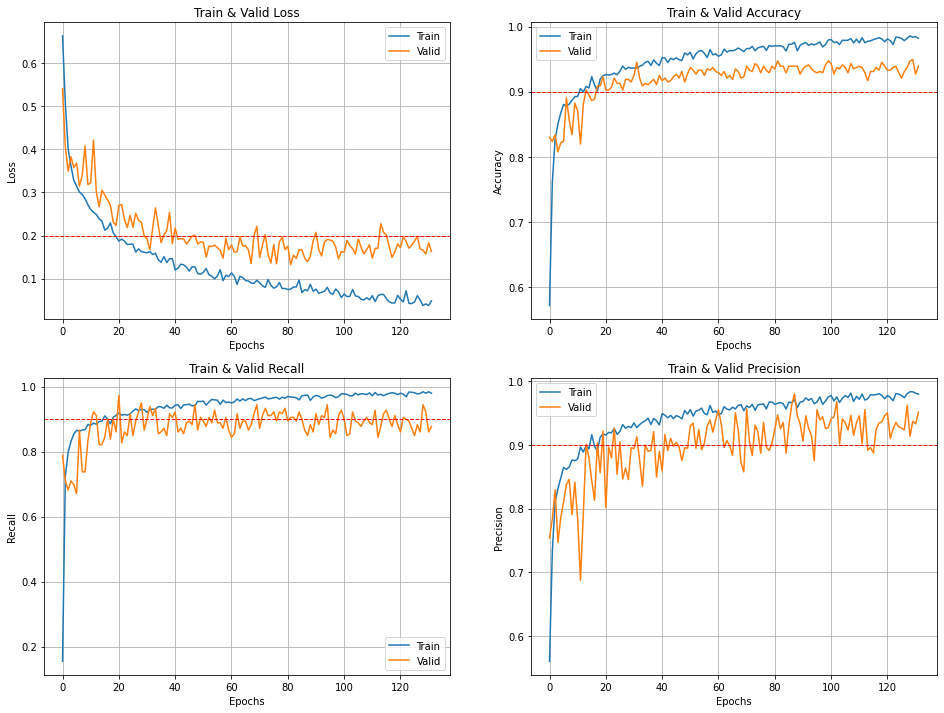

In [ ]:
#전체 epoch 결과 출력
plot_score(hist)

In [ ]:
#best model 불러오기

bestV01 = models.load_model('best_vanilla01.h5')

#best model evaluate(about validation data)

print_score(bestV01, valid_data)

25/25 [==============================] - 5s 166ms/step - loss: 0.1325 - accuracy: 0.9474 - recall: 0.9050 - precision: 0.9474


****************
*  Evaluation  *
****************

* Loss
==> 0.13250

* Accuracy
==> 0.94737

* Recall
==> 0.90503

* Precision
==> 0.94737


* CHECK INDEX : [329 340 234]


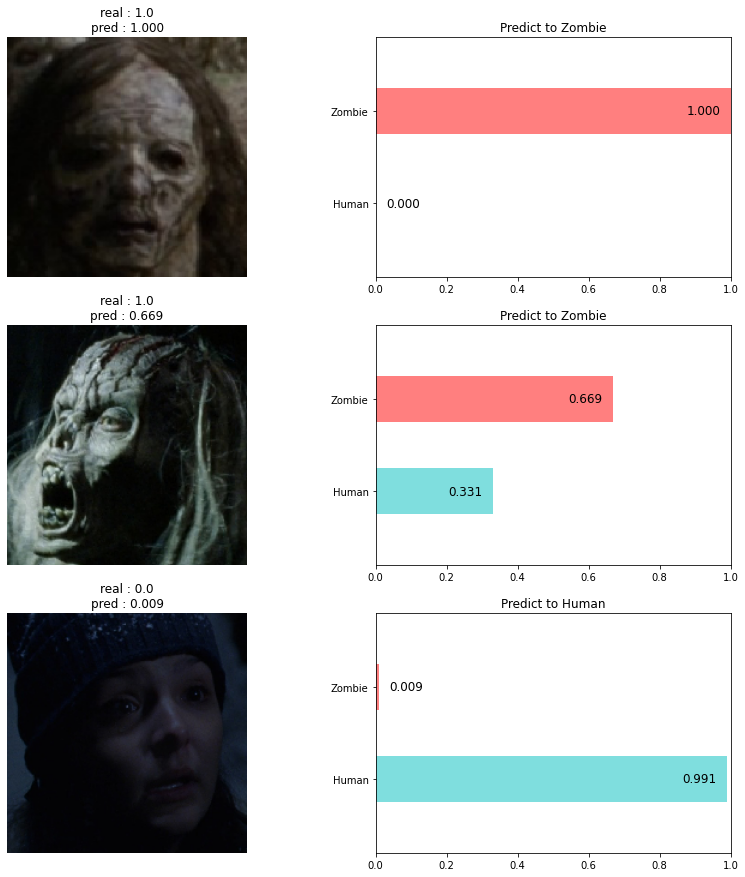

In [ ]:
plot_img(bestV01, valid_data)

In [ ]:
#best model 지정 디렉토리에 저장
model.save('/content/drive/My Drive/인공지능 프로젝트/models/vanilla01.h5')

***
<br><br><br><br>
***

## Test

In [ ]:
#best model evaluate(about test data) => 성능별로...

print_score(bestV01, test_data)

15/15 [==============================] - 12s 767ms/step - loss: 1.9145 - accuracy: 0.3966 - recall: 0.9180 - precision: 0.2445


****************
*  Evaluation  *
****************

* Loss
==> 1.91452

* Accuracy
==> 0.39661

* Recall
==> 0.91803

* Precision
==> 0.24454


* CHECK INDEX : [278  24 263]


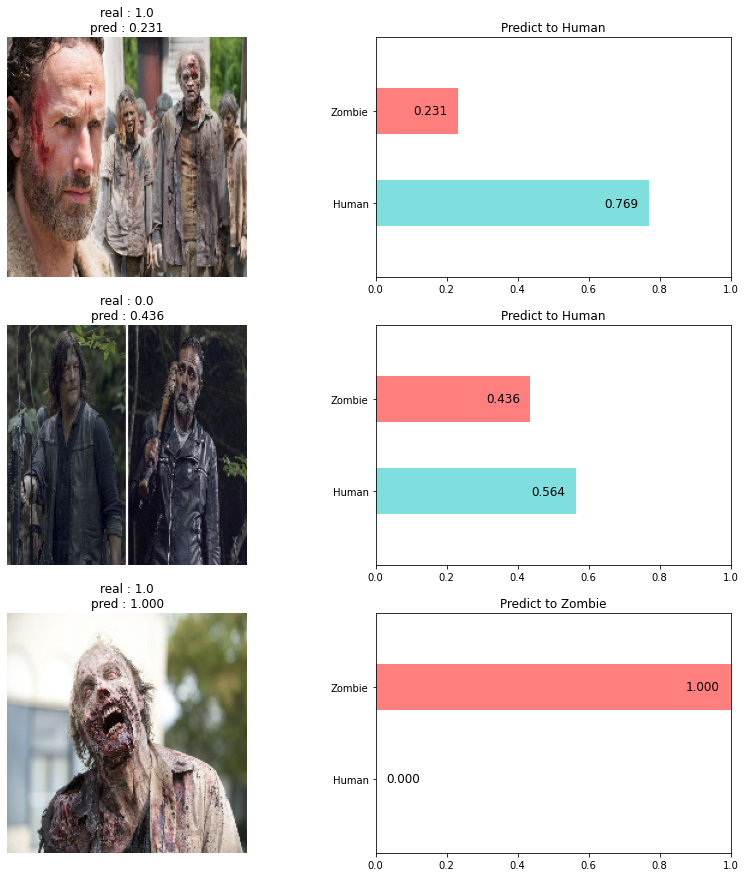

In [ ]:
plot_img(bestV01, test_data)